### Curiosity and Overview
Electric vehicles are not only an innovative leap in automotive technology but also a treasure trove of numerical insights. In this notebook, we examine a dataset of electric car specifications predicted for 2025. If you find this analysis useful, feel free to upvote it.

We'll uncover patterns from battery capacities to acceleration times, and even predict the acceleration of these electric marvels using a linear model. Let the data do the talking.

In [1]:
# Importing necessary libraries and suppressing warnings
import warnings

warnings.filterwarnings("ignore")

import matplotlib
import numpy as np
import pandas as pd

matplotlib.use("Agg")  # Ensuring non-interactive backend for matplotlib
import matplotlib.pyplot as plt

plt.switch_backend("Agg")  # Switching backend if only plt module is imported

%matplotlib inline

import seaborn as sns

# Set a consistent style
sns.set(style="whitegrid")

### Data Loading and Overview¶
In this section, we load our dataset and take a brief look at its structure. The dataset contains a variety of features about electric vehicles including performance metrics and battery specifications.

In [2]:
# Load the dataset
data_path = "electric_vehicles_spec_2025.csv.csv"
df = pd.read_csv(data_path, encoding="EUC-KR")

# Display the first few rows of the dataset
print("Dataset loaded with shape:", df.shape)
df.head()

Dataset loaded with shape: (478, 22)


,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


### Data Cleaning and Preprocessing
Before diving into the analysis, we tidy up our data. We check for missing values, convert data types if needed, and prepare our features. Note that if you ever encounter encoding or type-related errors, double-check the file encoding (here we use EUC-KR) and the inferred types.

In [3]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Convert columns to appropriate data types if needed (example casting for numeric columns)
numeric_columns = [
    "top_speed_kmh",
    "battery_capacity_kWh",
    "number_of_cells",
    "torque_nm",
    "efficiency_wh_per_km",
    "range_km",
    "acceleration_0_100_s",
    "fast_charging_power_kw_dc",
    "towing_capacity_kg",
    "seats",
    "length_mm",
    "width_mm",
    "height_mm",
]

for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows with missing target values in case of predictor development
df = df.dropna(subset=["acceleration_0_100_s"])

# For simplicity, fill remaining missing numeric values with median and categorical with mode
for col in df.columns:
    if df[col].dtype in ["float64", "int64"]:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("Data shape after cleaning:", df.shape)

Missing values in each column:
brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64
Data shape after cleaning: (478, 22)


### Exploratory Data Analysis
Now comes the fun part of visually exploring the dataset. We will create several plots including histograms, pair plots, and a correlation heatmap. Note that the correlation heatmap is generated from the numeric subset of data. This kind of multi-faceted analysis helps in understanding the distributions and relationships in the data.

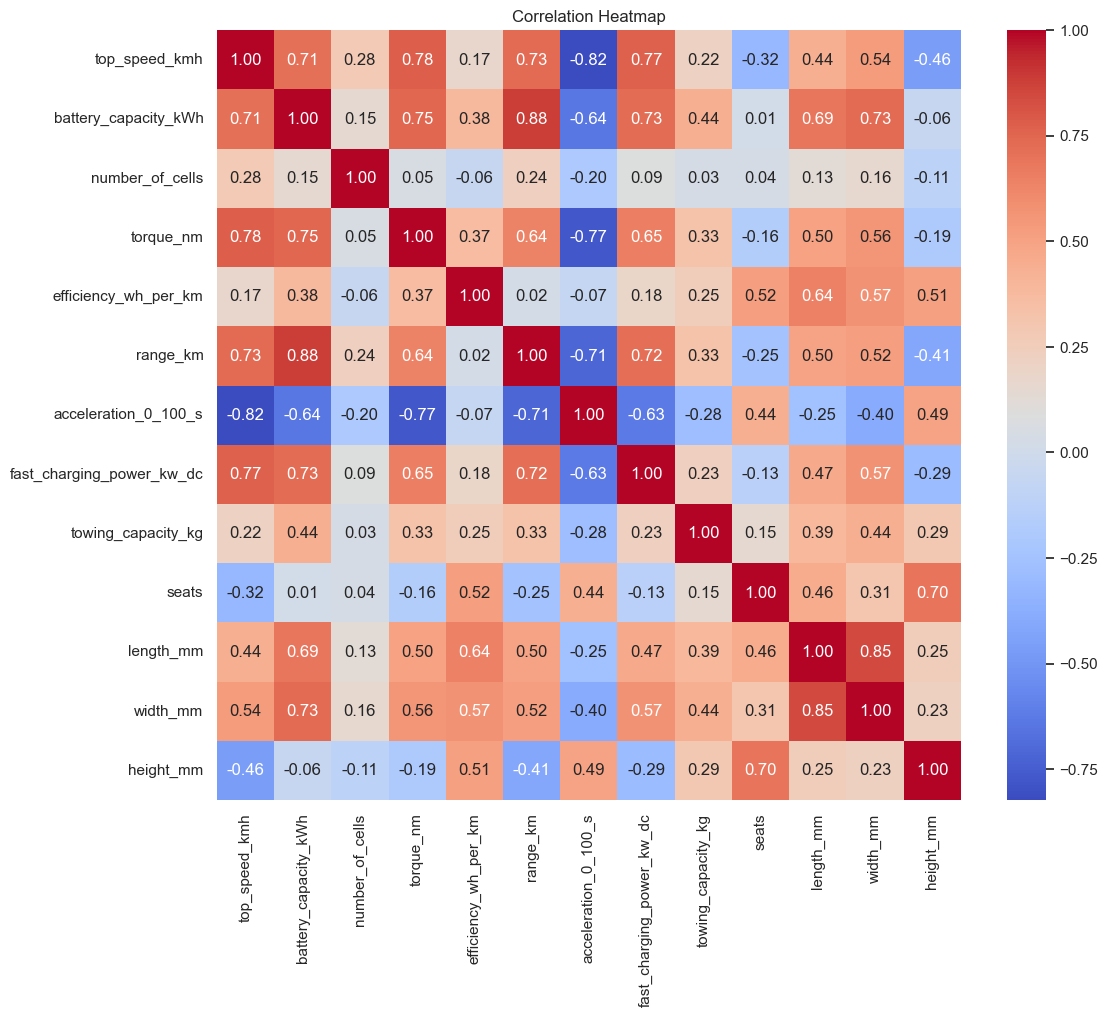

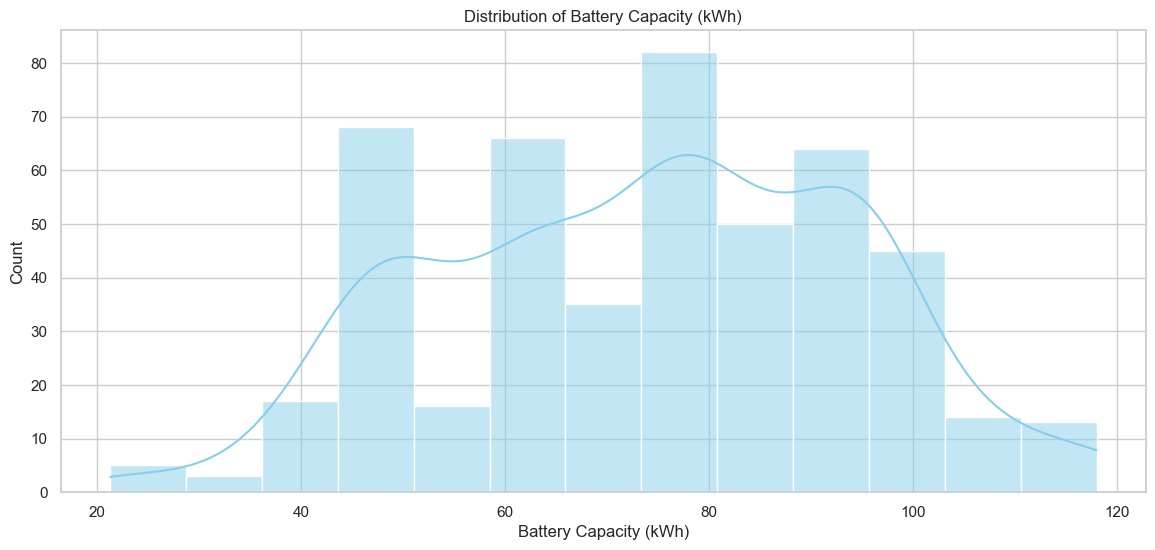

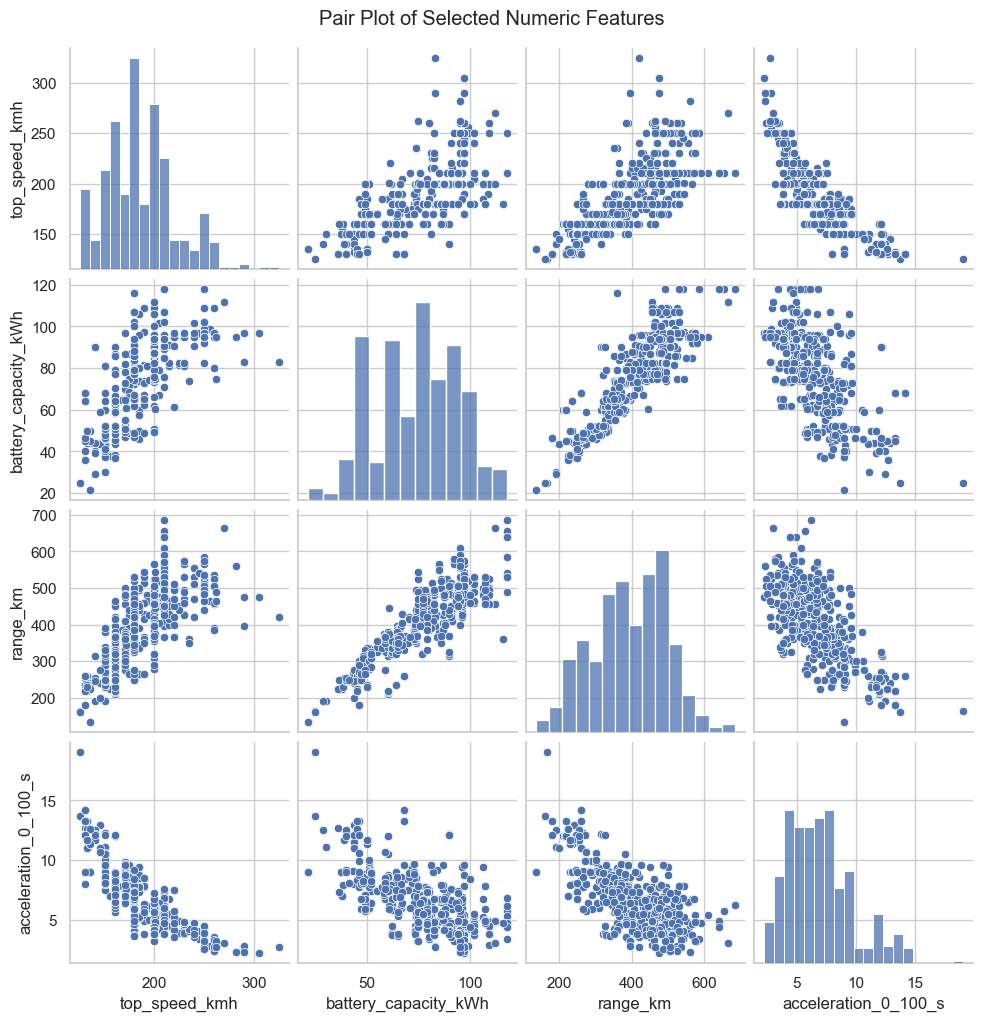

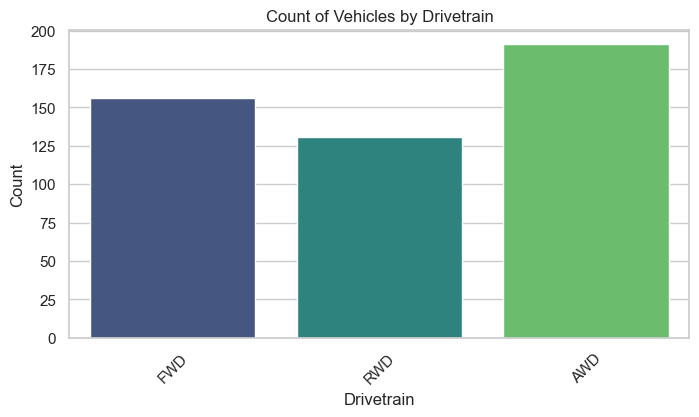

In [4]:
# Numeric dataframe for correlation heatmap (only if there are at least 4 numeric columns)
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Not enough numeric columns for a correlation heatmap.")

# Histogram for key numeric features
plt.figure(figsize=(14, 6))
sns.histplot(df["battery_capacity_kWh"], kde=True, color="skyblue")
plt.title("Distribution of Battery Capacity (kWh)")
plt.xlabel("Battery Capacity (kWh)")
plt.show()

# Pair Plot to visualize relationships between a handful of numeric variables
subset_columns = ["top_speed_kmh", "battery_capacity_kWh", "range_km", "acceleration_0_100_s"]
sns.pairplot(df[subset_columns])
plt.suptitle("Pair Plot of Selected Numeric Features", y=1.02)
plt.show()

# Count plot for a categorical variable (e.g., drivetrain)
plt.figure(figsize=(8, 4))
sns.countplot(x="drivetrain", data=df, palette="viridis")
plt.title("Count of Vehicles by Drivetrain")
plt.xlabel("Drivetrain")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Predictor Model
For those with an appetite for predictive analytics, we now attempt to predict the 0-100 acceleration time (in seconds) of these electric vehicles using a linear regression model. Our approach uses several numerical features as predictors. In real-life practice, one would consider feature selection and non-linear models. Here, we stick to linear regression for its transparency and interpretability.

R^2 score of the Linear Regression model: 0.824


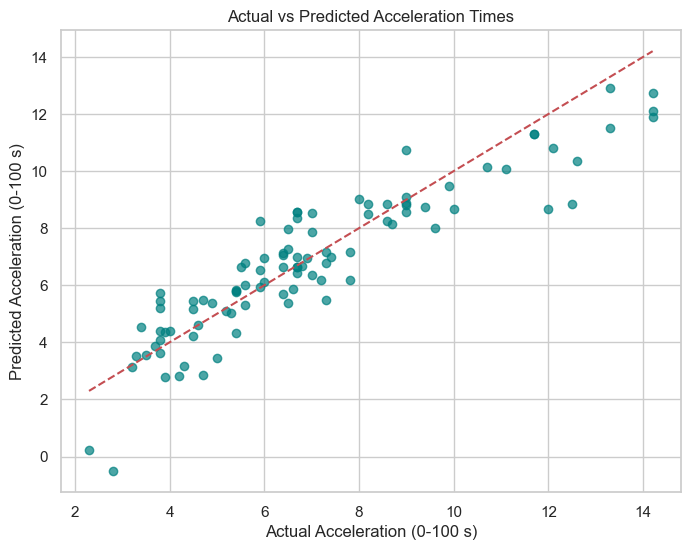

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Define features and target variable. Exclude target and possibly other non-relevant features
predictor_features = [
    "top_speed_kmh",
    "battery_capacity_kWh",
    "number_of_cells",
    "torque_nm",
    "efficiency_wh_per_km",
    "range_km",
    "fast_charging_power_kw_dc",
    "towing_capacity_kg",
    "seats",
    "length_mm",
    "width_mm",
    "height_mm",
]

X = df[predictor_features]
y = df["acceleration_0_100_s"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 score of the Linear Regression model: {r2:.3f}")

# As a note, while R^2 provides insight into the explained variance, further analysis with residuals may be necessary.

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="teal")
plt.xlabel("Actual Acceleration (0-100 s)")
plt.ylabel("Predicted Acceleration (0-100 s)")
plt.title("Actual vs Predicted Acceleration Times")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()

### Conclusion
This notebook demonstrated a comprehensive analysis of electric vehicle performance and battery specs. The exploratory analysis revealed intriguing relationships among performance metrics, and our simple linear regression model provided a baseline for predicting acceleration times.

The approach used here leverages a combination of visualization techniques and predictive modeling to extract actionable insights. Future analyses could explore:

More sophisticated models or non-linear relationships
Feature engineering to improve prediction accuracy
Cross-validation and hyperparameter tuning for robust evaluation
Analysis of categorical variables (e.g., battery type or drivetrain) with statistical tests
If you found this notebook engaging or informative, consider upvoting it. After all, in the fast lane of data science, every bit of positive feedback helps accelerate progress.